# Importing data

## Games table

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure better quality for the plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style("darkgrid")

games = pd.read_excel(r'data/megasena.xlsx')
positions = ['position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'position_6']
games.columns = positions
games.head() # Importing the first 5 games

,position_1,position_2,position_3,position_4,position_5,position_6
0,2,10,18,25,34,44
1,3,13,16,25,27,33
2,2,6,10,14,34,56
3,3,20,45,52,53,58
4,19,25,43,44,48,49


## Information table

In [2]:
info = pd.read_excel(r'data/info.xlsx')
info.head()

,2558,25/01/2023
0,2557,21/01/2023
1,2556,18/01/2023
2,2555,14/01/2023
3,2554,12/01/2023
4,2553,10/01/2023


## Defining game position for each collumn

In [3]:
# fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10)) # 15, 10 -> width, height
# axs = axs.flatten()

# pos_mean = []
# pos_std = []
# for i, position in enumerate(positions):
#     sns.countplot(x=position, data=games, palette="GnBu_d", ax=axs[i])
#     pos_mean.append(games[position].mean().round(0))
#     pos_std.append(games[position].std().round(0))
#     axs[i].set_title(f"Position {i+1}")
#     axs[i].set_xlabel('Number')
#     axs[i].set_ylabel('Occurrences')
#     axs[i].tick_params(axis='x', labelrotation=50)
    
# plt.tight_layout()
# plt.show()


In [4]:
games.describe().round(2)

,position_1,position_2,position_3,position_4,position_5,position_6
count,2558.00,2558.00,2558.00,2558.00,2558.00,2558.00
mean,8.61,17.33,26.33,35.08,43.55,52.17
std,7.02,9.16,10.00,9.79,9.03,6.97
min,1.00,2.00,3.00,8.00,11.00,22.00
25%,3.00,10.00,19.00,28.00,38.00,49.00
50%,7.00,16.00,26.00,35.00,45.00,54.00
75%,12.00,23.00,33.00,42.00,51.00,58.00
max,50.00,51.00,56.00,58.00,59.00,60.00


# Sorting positions by Occurrences

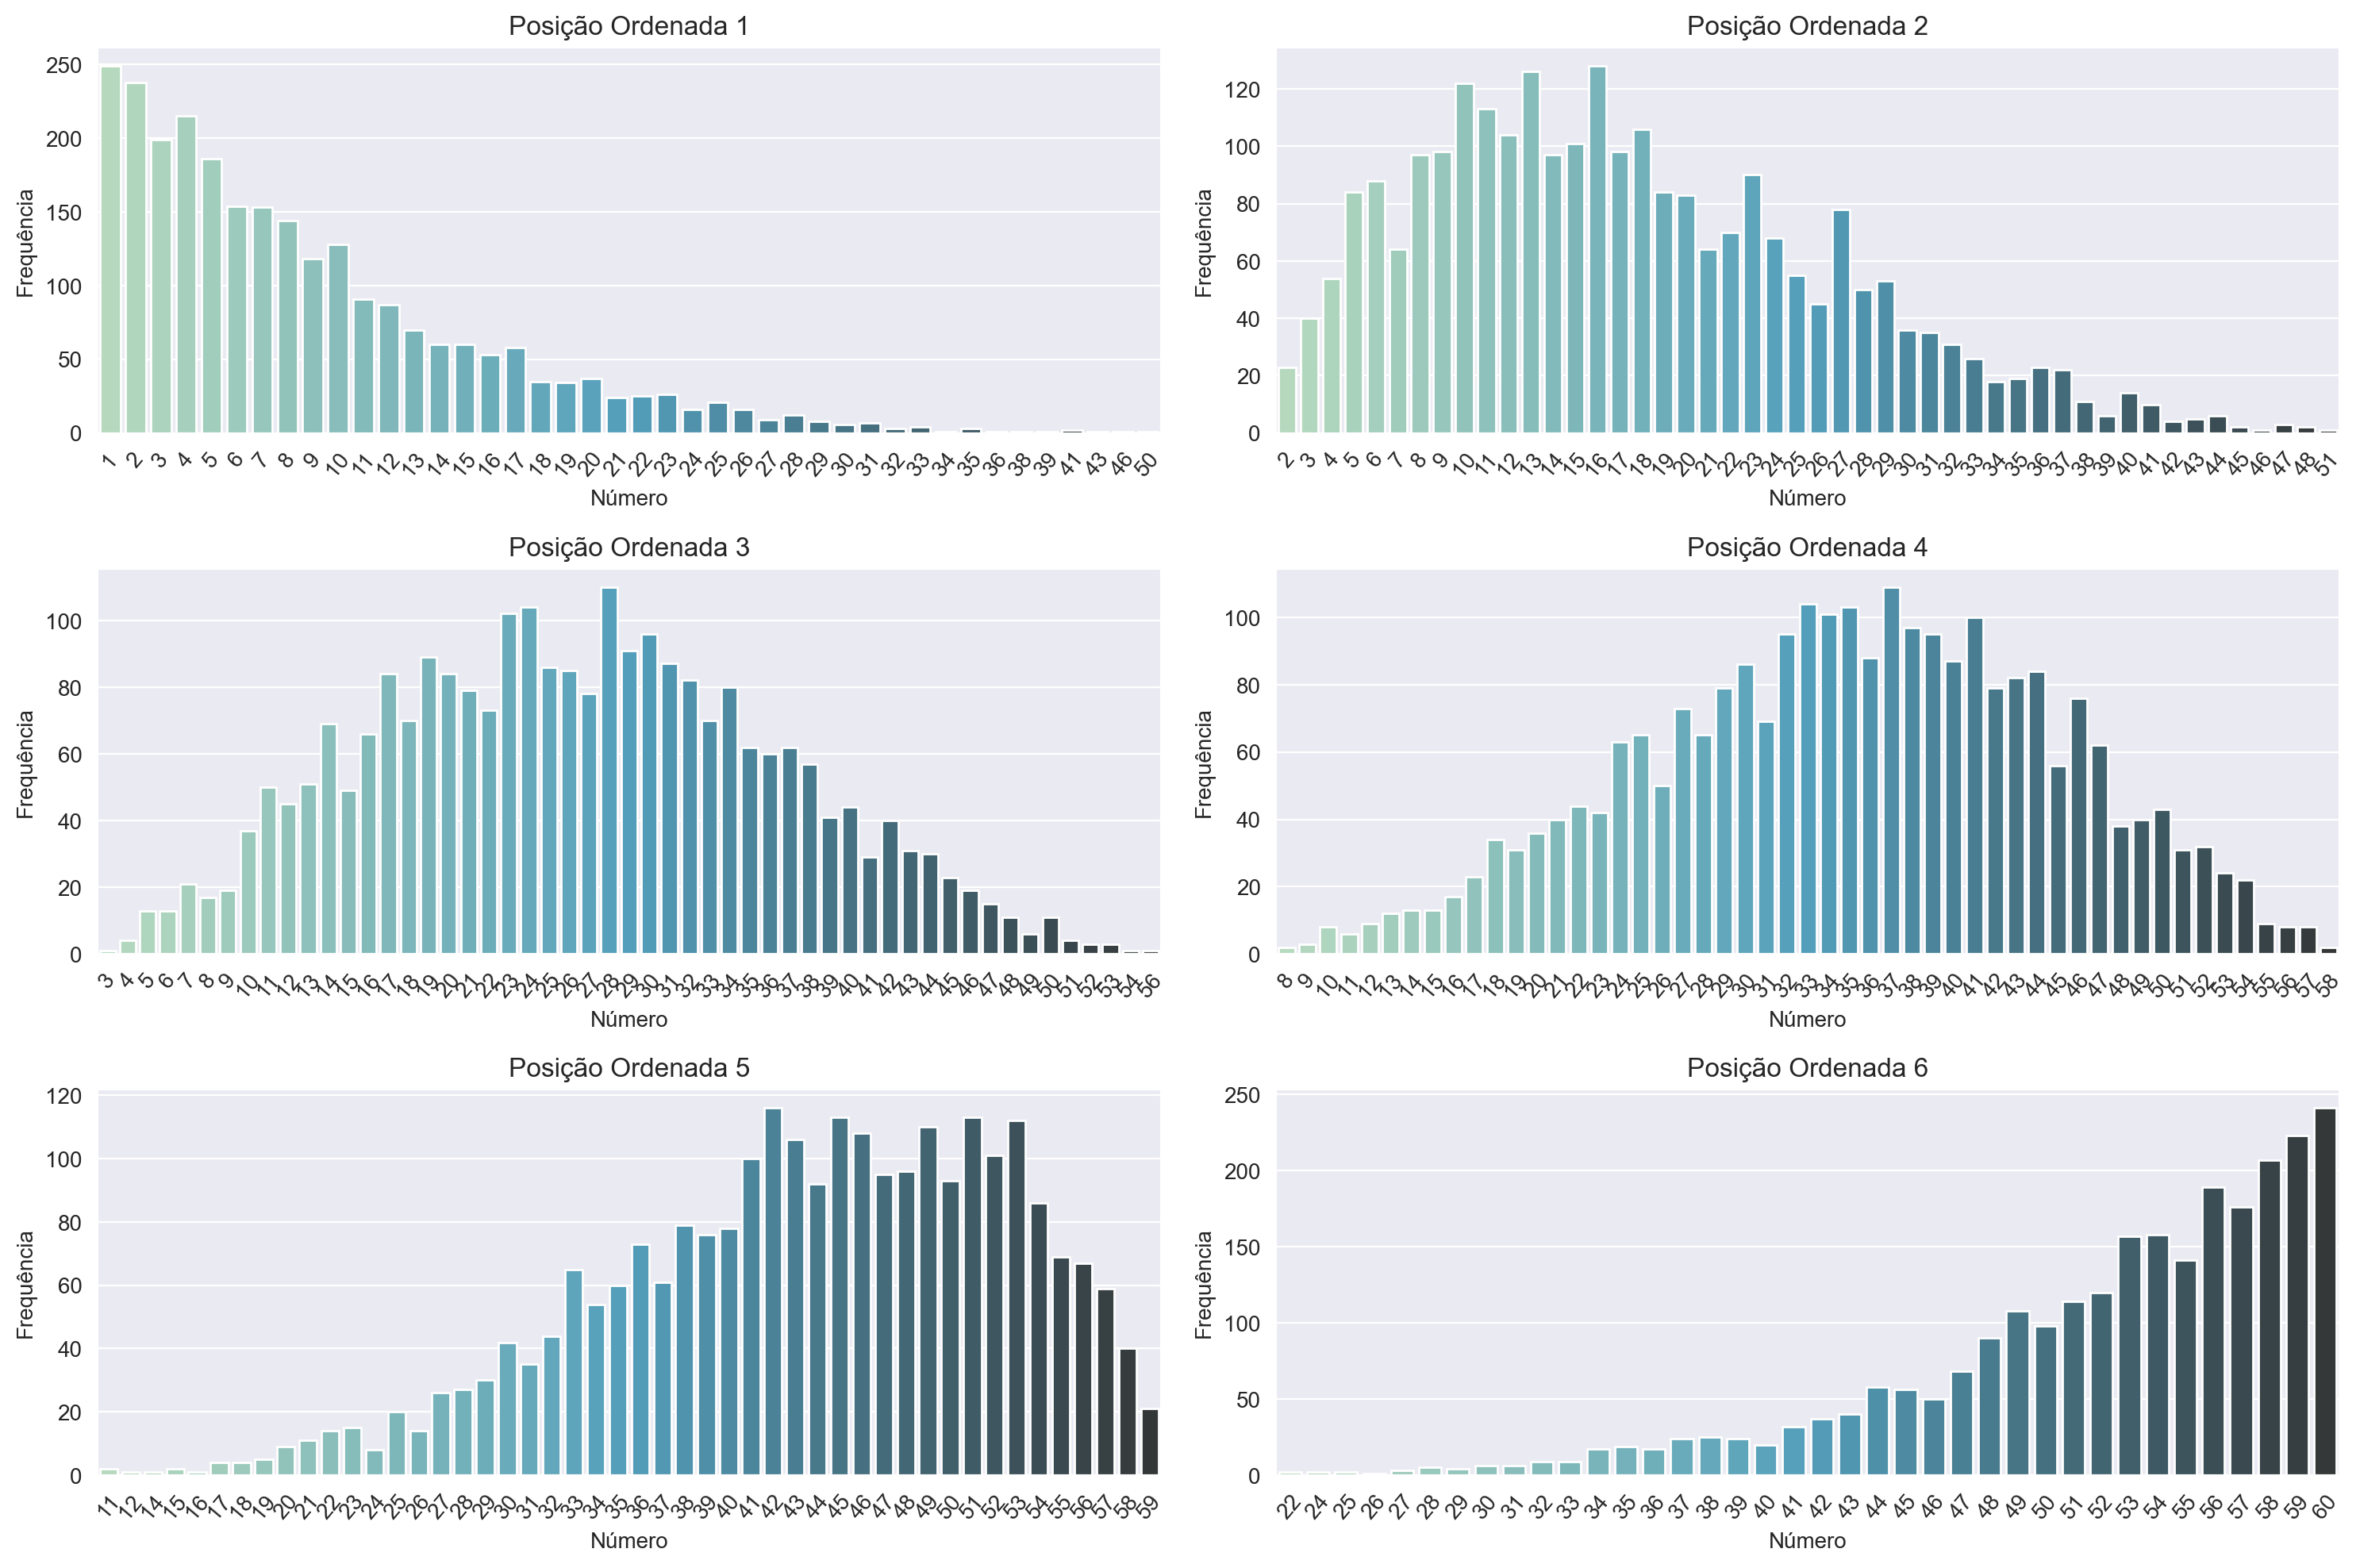

In [5]:
sorted_positions = []
for i, position in enumerate(positions):
  sorted_positions.append(games[position].value_counts())

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10)) # 15, 10 -> width, height
axs = axs.flatten()

for i, position in enumerate(sorted_positions):
    sns.barplot(x=position.index, y=position.values, ax=axs[i], palette="GnBu_d")
    axs[i].set_title(f"Posição Ordenada {i+1}")
    axs[i].set_xlabel('Número')
    axs[i].set_ylabel('Frequência')
    axs[i].tick_params(axis='x', labelrotation=50)

plt.tight_layout()
plt.show()


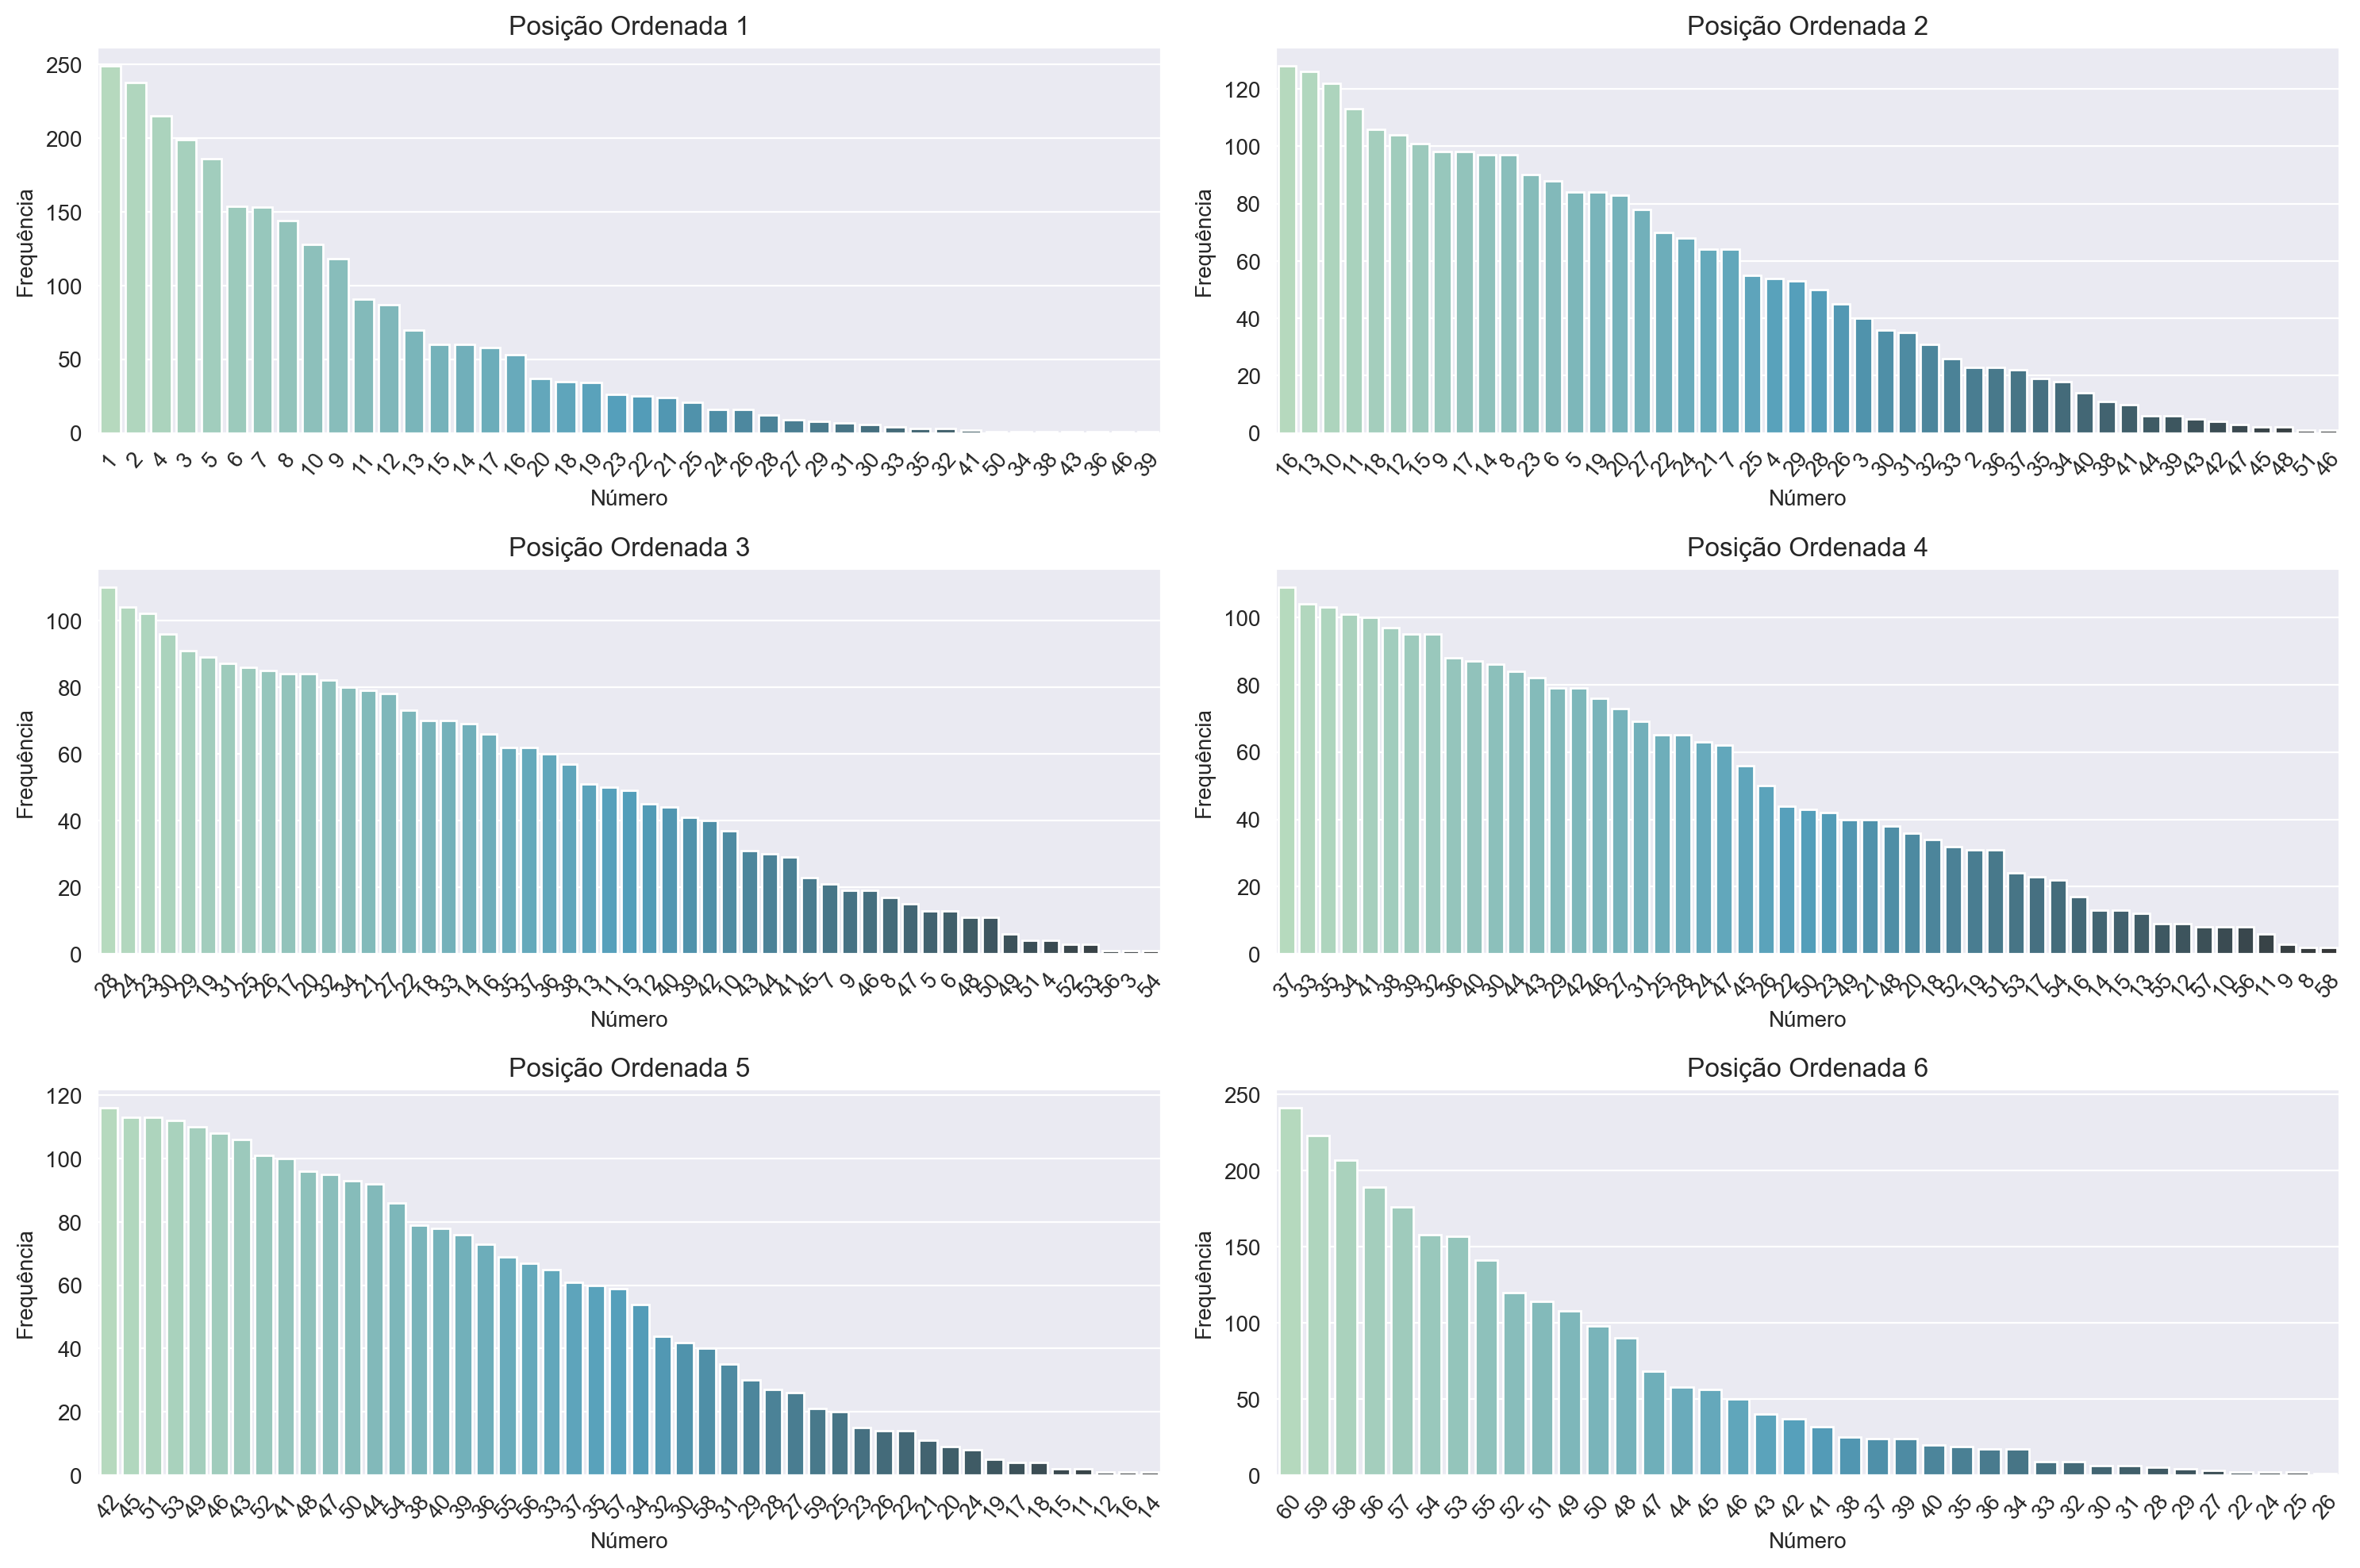

In [6]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10)) # 15, 10 -> width, height
axs = axs.flatten()

for i, position in enumerate(sorted_positions):
    sns.barplot(x=position.index, y=position.values, ax=axs[i], order=position.index, palette="GnBu_d")
    axs[i].set_title(f"Posição Ordenada {i+1}")
    axs[i].set_xlabel('Número')
    axs[i].set_ylabel('Frequência')
    axs[i].tick_params(axis='x', labelrotation=50)
    axs[i].set_xticklabels(position.index) # set x-axis tick labels
    
plt.tight_layout()
plt.show()

## Main statistics data

In [7]:
games.describe()

,position_1,position_2,position_3,position_4,position_5,position_6
count,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000
mean,8.612979,17.332682,26.334636,35.079359,43.545739,52.170446
std,7.021807,9.164936,9.997644,9.787314,9.025280,6.970963
min,1.000000,2.000000,3.000000,8.000000,11.000000,22.000000
25%,3.000000,10.000000,19.000000,28.000000,38.000000,49.000000
50%,7.000000,16.000000,26.000000,35.000000,45.000000,54.000000
75%,12.000000,23.000000,33.000000,42.000000,51.000000,58.000000
max,50.000000,51.000000,56.000000,58.000000,59.000000,60.000000


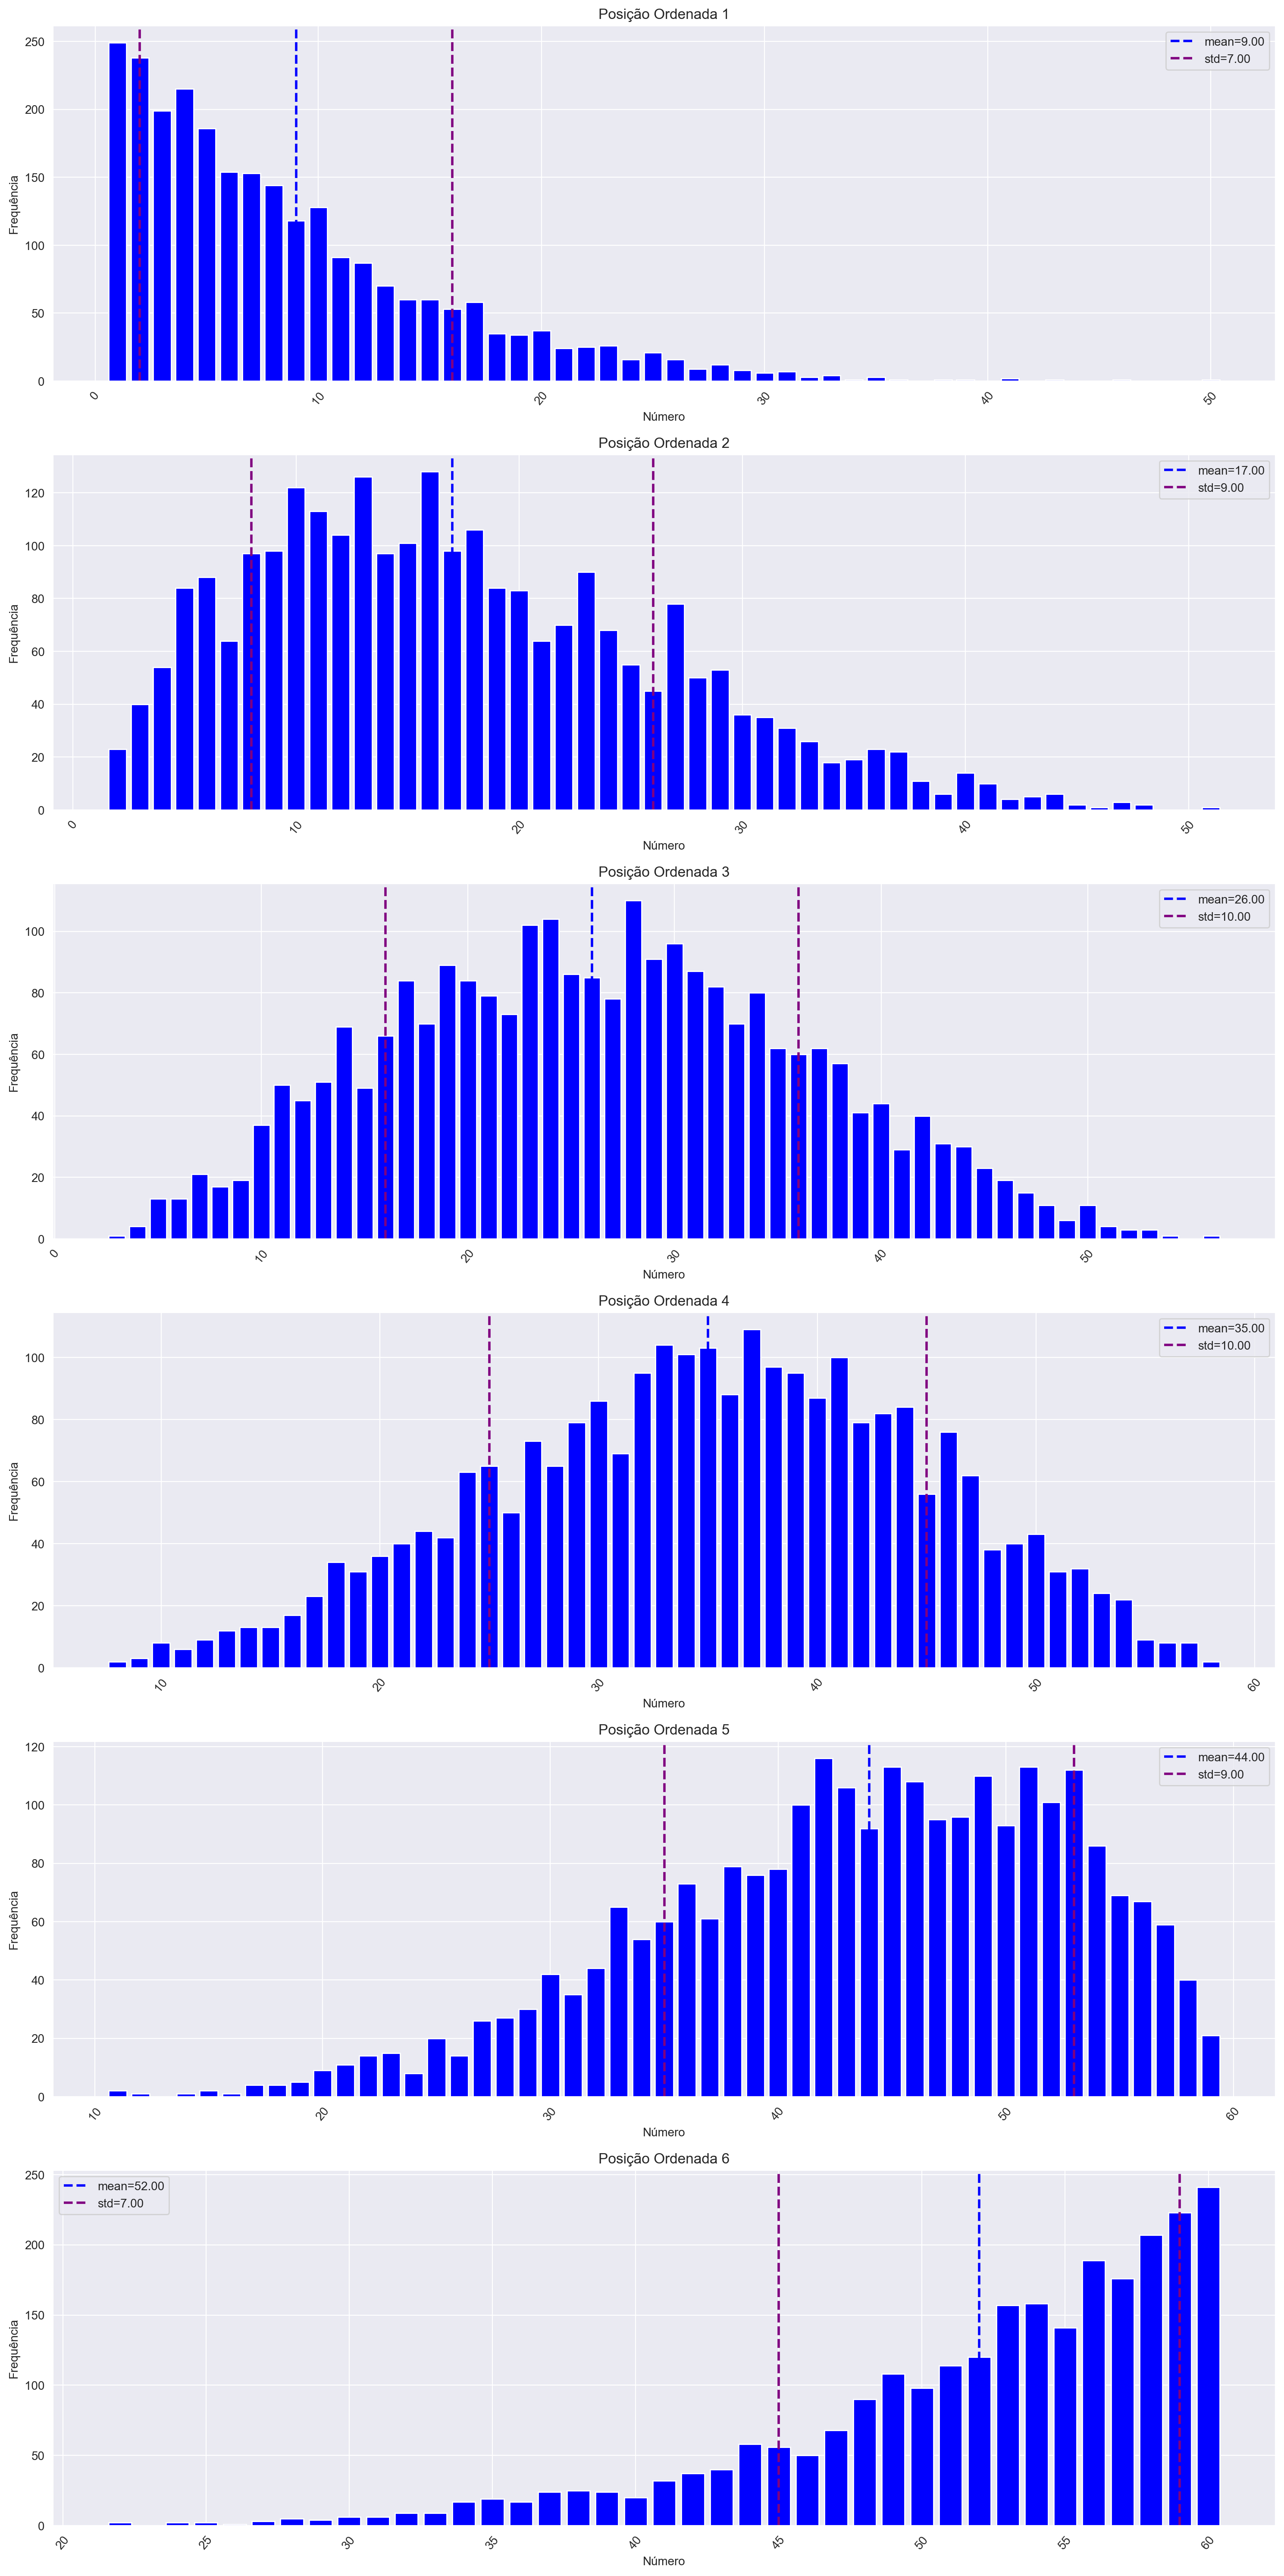

In [8]:
sorted_positions = []
for i, position in enumerate(positions):
    sorted_positions.append(games[position].value_counts())

fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(15, 30))
axs = axs.flatten()

def get_statistics(i):
    column_data = games.iloc[:, i]
    return {
        'mean': column_data.mean().round(0),
        'std': column_data.std().round(0),
        '25%': column_data.describe()['25%'],
        '50%': column_data.describe()['50%'],
        '75%': column_data.describe()['75%'],
    }


def display_statistics(ax, i):
    column_statistics = get_statistics(i)
    ax.axvline(column_statistics['mean'], color='blue', linestyle='dashed', linewidth=2, label=f"mean={column_statistics['mean']:.2f}")
    ax.axvline(column_statistics['mean'] - column_statistics['std'], color='purple', linestyle='dashed', linewidth=2, label=f"std={column_statistics['std']:.2f}")
    ax.axvline(column_statistics['mean'] + column_statistics['std'], color='purple', linestyle='dashed', linewidth=2)
    # ax.axvline(column_statistics['25%'], color='orange', linestyle='dashed', linewidth=2, label='25%')
    # ax.axvline(column_statistics['50%'], color='purple', linestyle='dashed', linewidth=2, label='50%')
    # ax.axvline(column_statistics['75%'], color='green', linestyle='dashed', linewidth=2, label='75%')
    
    # Add legend
    ax.legend(loc='best')


for i, position in enumerate(sorted_positions):
    axs[i].bar(position.index, position.values, color='blue')
    axs[i].set_title(f"Posição Ordenada {i+1}")
    axs[i].set_xlabel('Número')
    axs[i].set_ylabel('Frequência')
    axs[i].tick_params(axis='x', labelrotation=50)
    display_statistics(axs[i], i)

plt.tight_layout()
plt.show()


# Generating a game based on Standard Deviation

## Plotting graphs according to Std

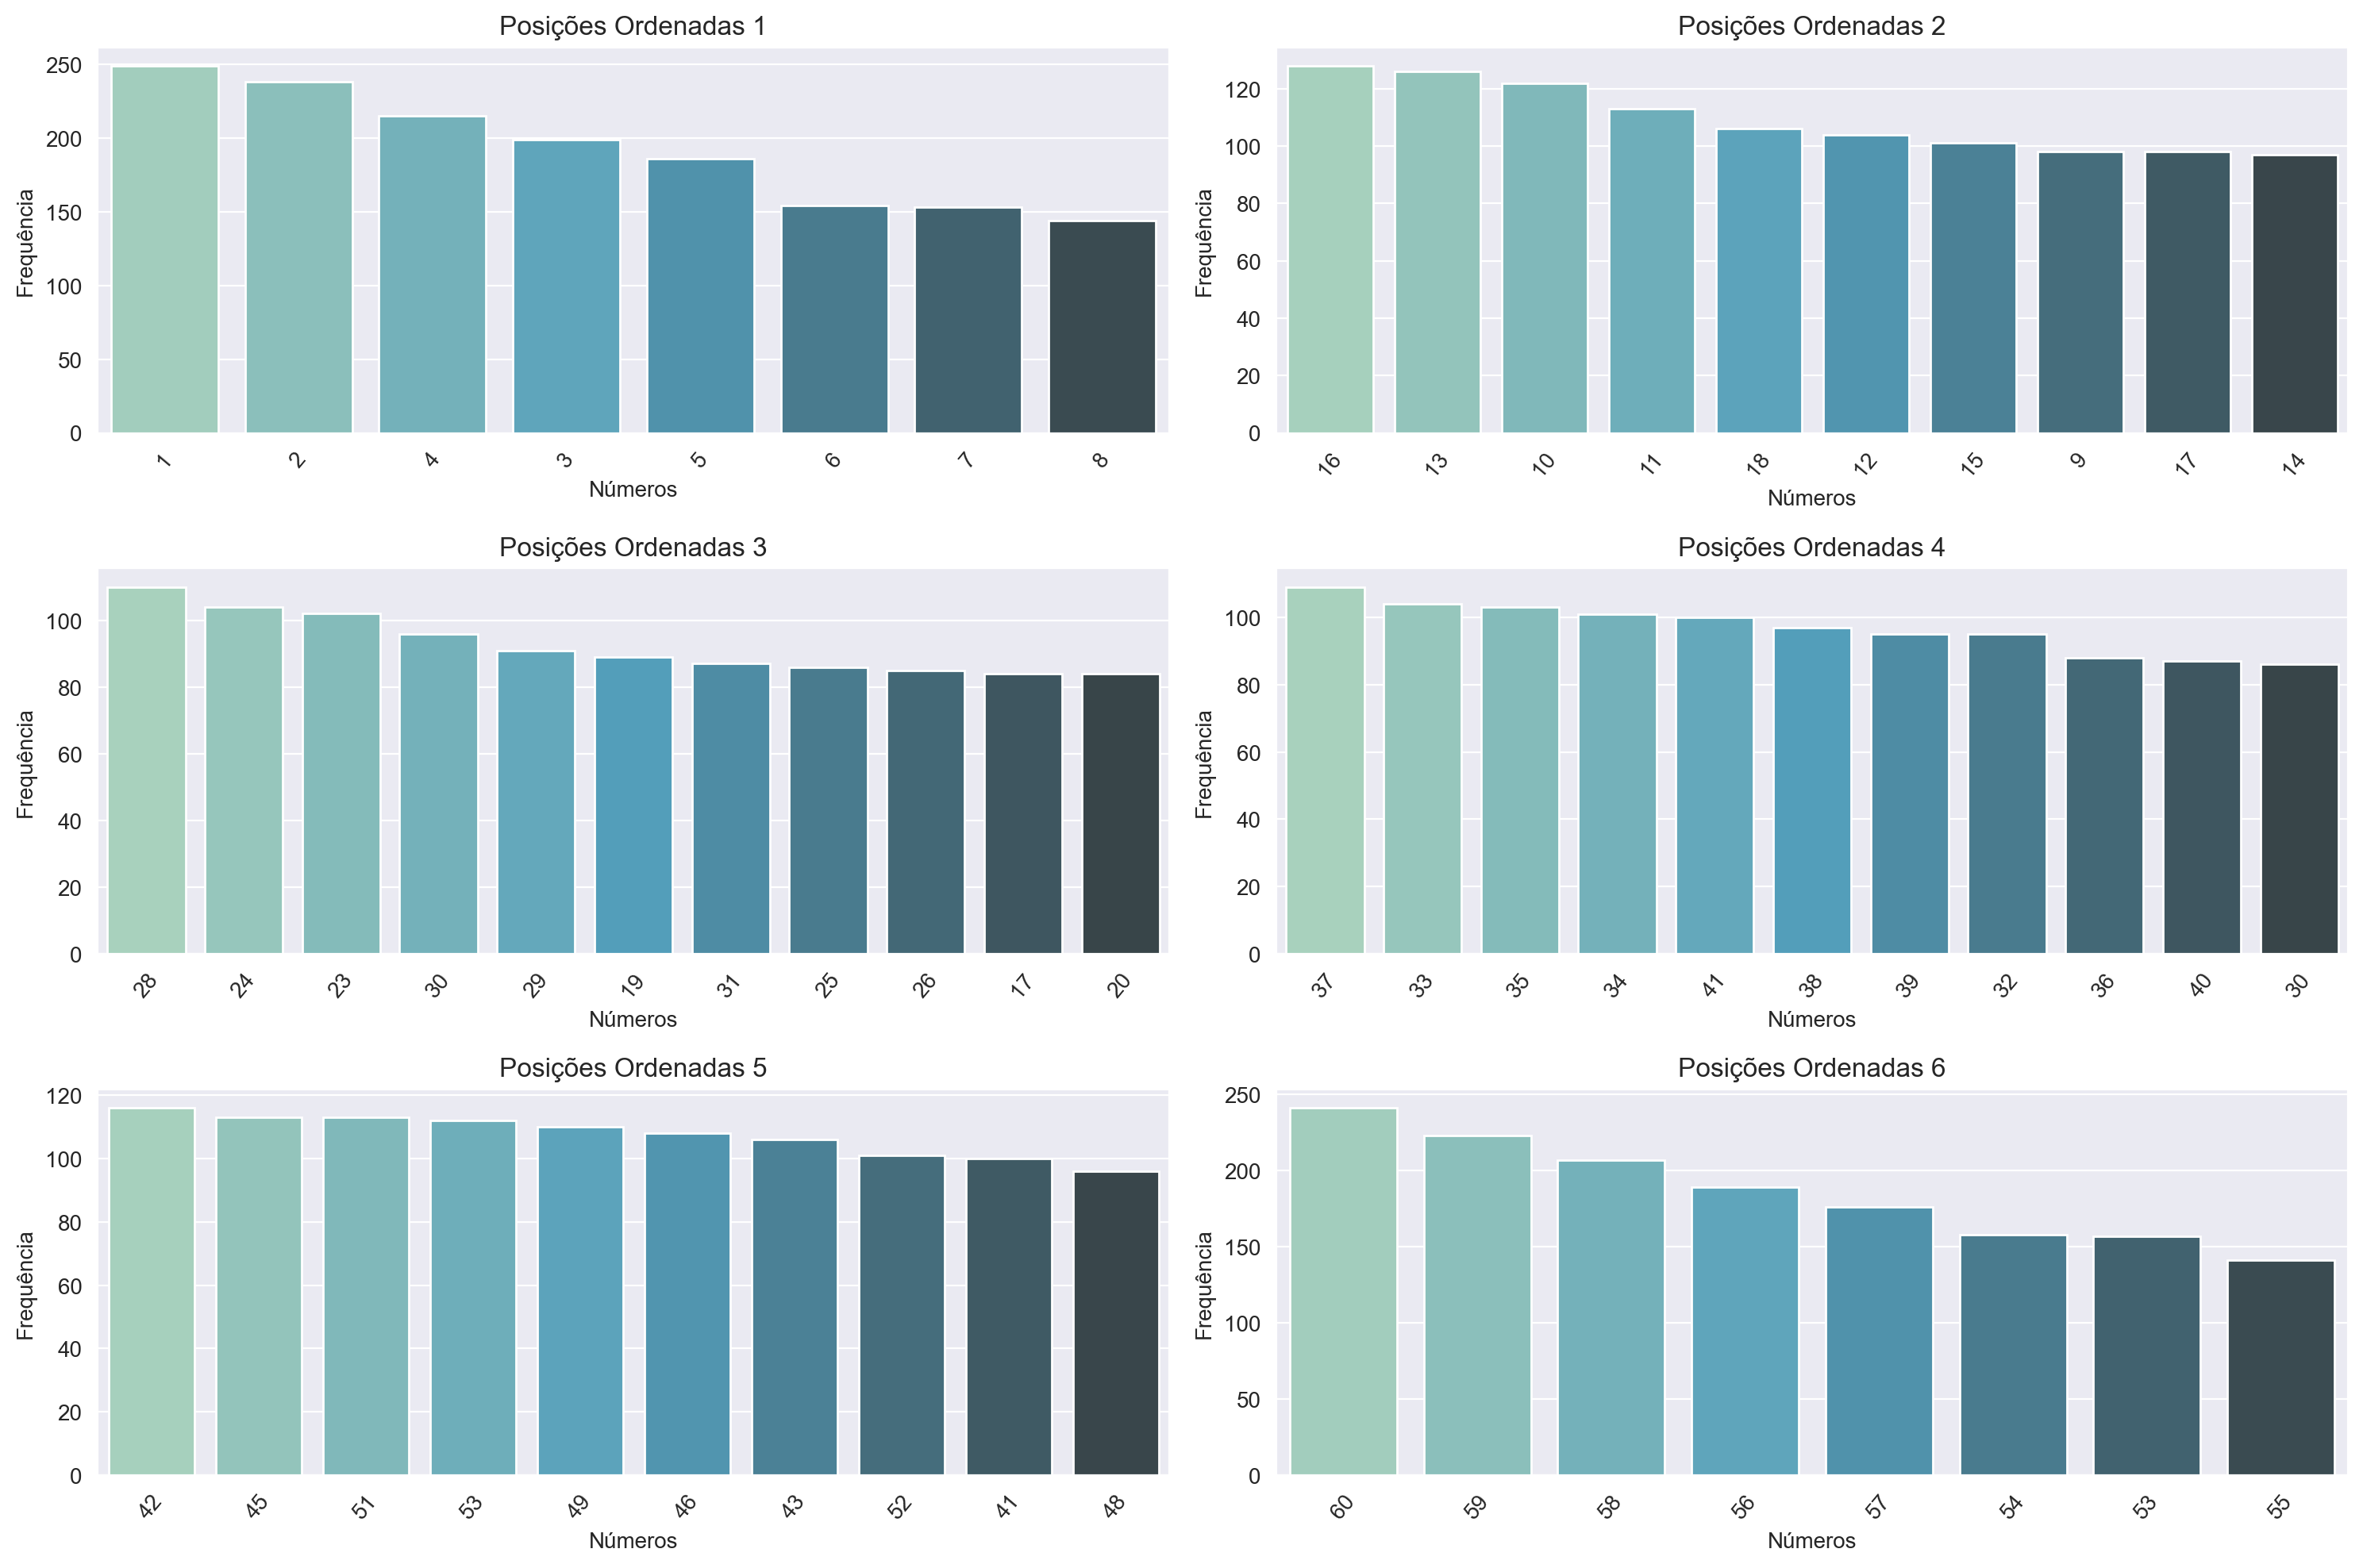

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10)) # 15, 10 -> width, height
axs = axs.flatten()

sorted_positions_limited = []

for i, position in enumerate(positions):
    counts = games[position].value_counts()
    column_statistics = get_statistics(i)
    std = column_statistics['std']
    upper_limit = int(std)
    
    # Store the original index before resetting it
    original_index = counts.index
    # Reset the index of the limited counts
    counts_limited = counts.reset_index(drop=True)
    
    # Assign the original index back to the limited counts
    counts_limited.index = original_index
    
    # Limit the counts to the upper limit
    counts_limited = counts_limited[:upper_limit+1]
    
    sorted_positions_limited.append(counts_limited)
  

# print(sorted_positions_limited)
for i, position in enumerate(sorted_positions_limited):
    sns.barplot(x=position.index, y=position.values, ax=axs[i], order=position.index, palette="GnBu_d")
    axs[i].set_title(f"Posições Ordenadas {i+1}")
    axs[i].set_xlabel('Números')
    axs[i].set_ylabel('Frequência')
    axs[i].tick_params(axis='x', labelrotation=50)
    axs[i].set_xticklabels(position.index) # set x-axis tick labels
    
plt.tight_layout()
plt.show()


## Generating a game

In [10]:
import random

def get_guesses():
  guesses = []
  for i, position in enumerate(sorted_positions_limited):
      guess = position.sample().index[0]
      guesses.append(guess)
  return guesses


## Check the guess in the database and generate name based on Std

In [11]:
from IPython.display import Markdown, display, HTML

# Get past results
past_results = games.values.tolist()
game_number = info.iloc[:, 0].to_list()
date = info.iloc[:, 1].to_list()

# Check guesses against past results
guesses = get_guesses()
correct_guesses = [0] * len(past_results)
for i, result in enumerate(past_results):
    for guess in guesses:
        if guess in result:
            correct_guesses[i] += 1

max_correct_guesses_index = correct_guesses.index(max(correct_guesses))
max_correct_guesses = correct_guesses[max_correct_guesses_index]

if max_correct_guesses >= 4:
    if max_correct_guesses == 4:
        type_of_prize = "Quadra"
    elif max_correct_guesses == 5:
        type_of_prize = "Quina"
    elif max_correct_guesses == 6:
        type_of_prize = "Sena"
    past_result = past_results[max_correct_guesses_index]
    game_number = game_number[max_correct_guesses_index-1]
    date = date[max_correct_guesses_index-1]
else:
    type_of_prize = "Você não ganhou nenhum prêmio."
    past_result = None
    game_number = None
    date = None

# Print output centered on the screen
output = "<center>"
output += "<h1>Número máximo de acertos: {}</h1>".format(max_correct_guesses)
output += "<h1>Palpite:</h1>"
output += '<div style="display: flex; justify-content: center; align-items: center;">'
for guess in guesses:
    output += '<div style="background-color: green; width: 50px; height: 50px; border-radius: 50%; margin: 5px; display: flex; justify-content: center; align-items: center; font-size: 24px; color: white;">'
    output += str(guess)
    output += '</div>'

output += '</div>'

# Print past result ball
if past_result is not None:
    output += "<h1>Resultado anterior:</h1>"
    output += '<div style="display: flex; justify-content: center; align-items: center;">'
    for value in past_result:
        output += '<div style="background-color: blue; width: 50px; height: 50px; border-radius: 50%; margin: 5px; display: flex; justify-content: center; align-items: center; font-size: 24px; color: white;">'
        output += str(value)
        output += '</div>'

    output += '</div>'
    output += '<div style="width: 20%; margin: 10px; border: 2px solid; border-radius: 8px;">'
    output += '<p>Data: {}</p>'.format(date)
    output += '<p>Tipo de prêmio: {}</p>'.format(type_of_prize)
    output += '<p>Jogo número: {}</p>'.format(game_number)
    output += '</div>'

else:
    output += '<h1 style="color: red">{}</h1>'.format(type_of_prize)
output += "</center>"
display(HTML(output))


## Using Machine Learning to predict a new result

### Plotting time series for positions

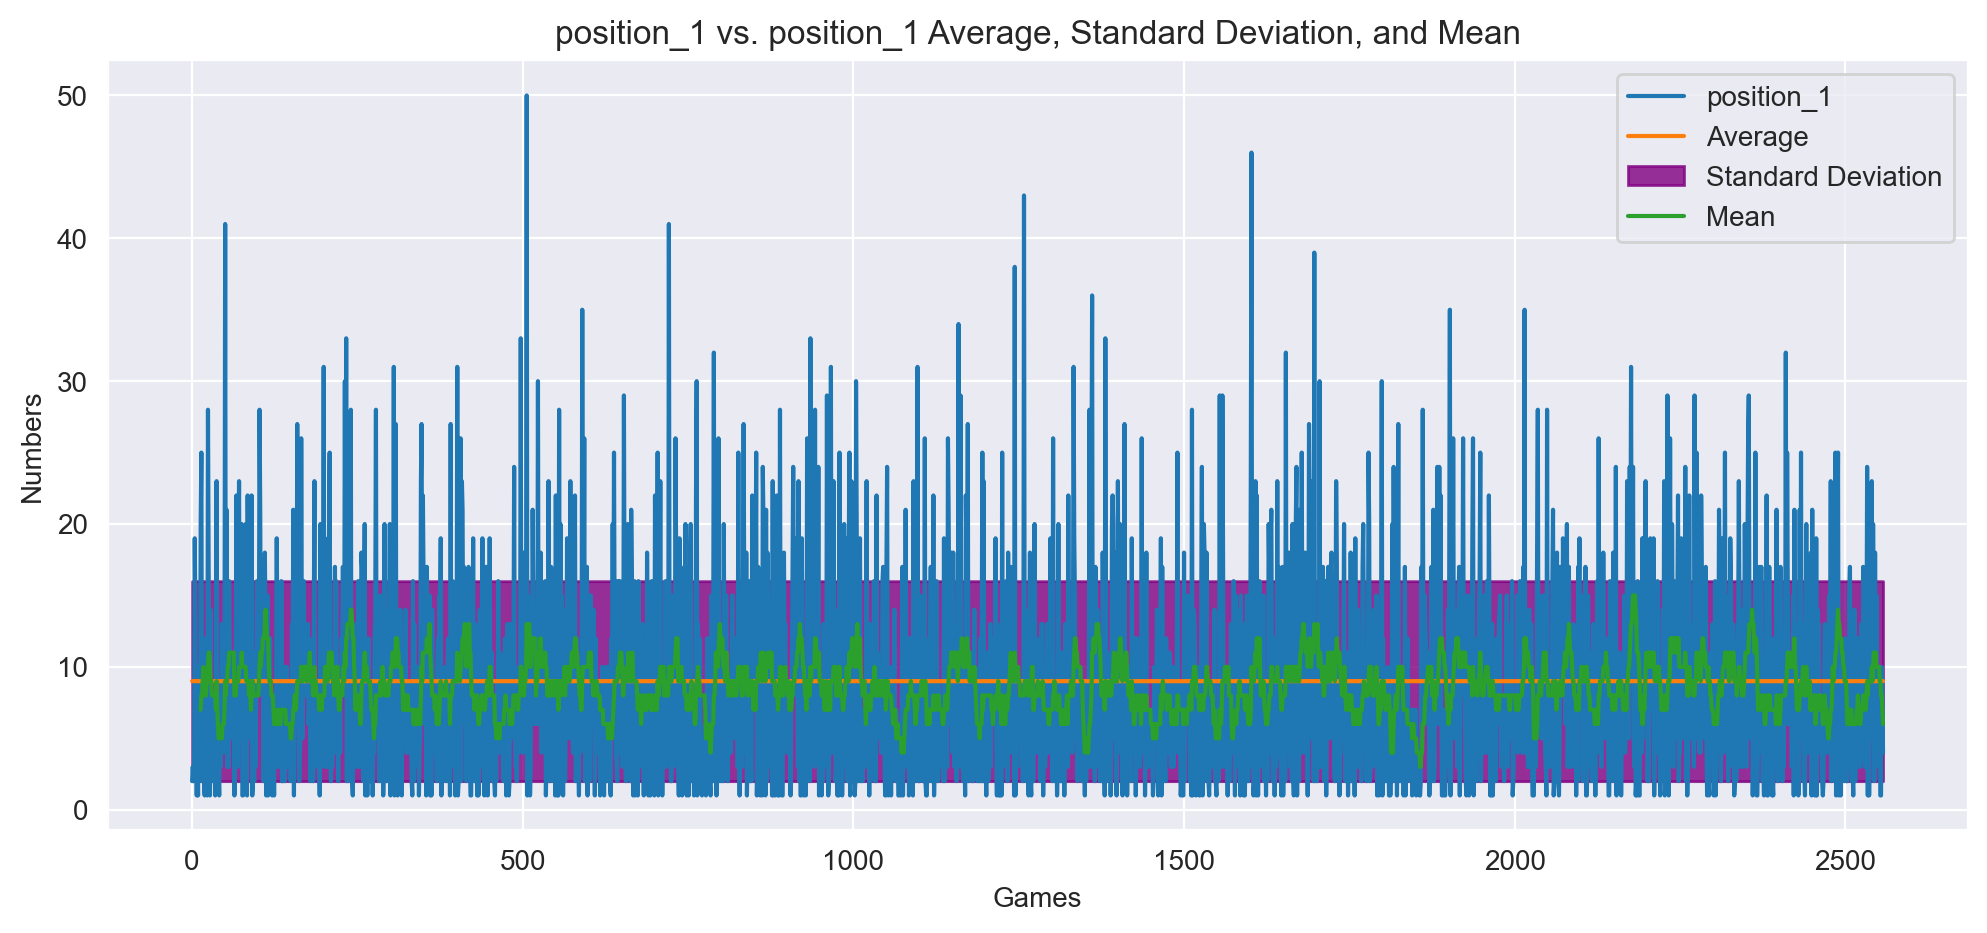

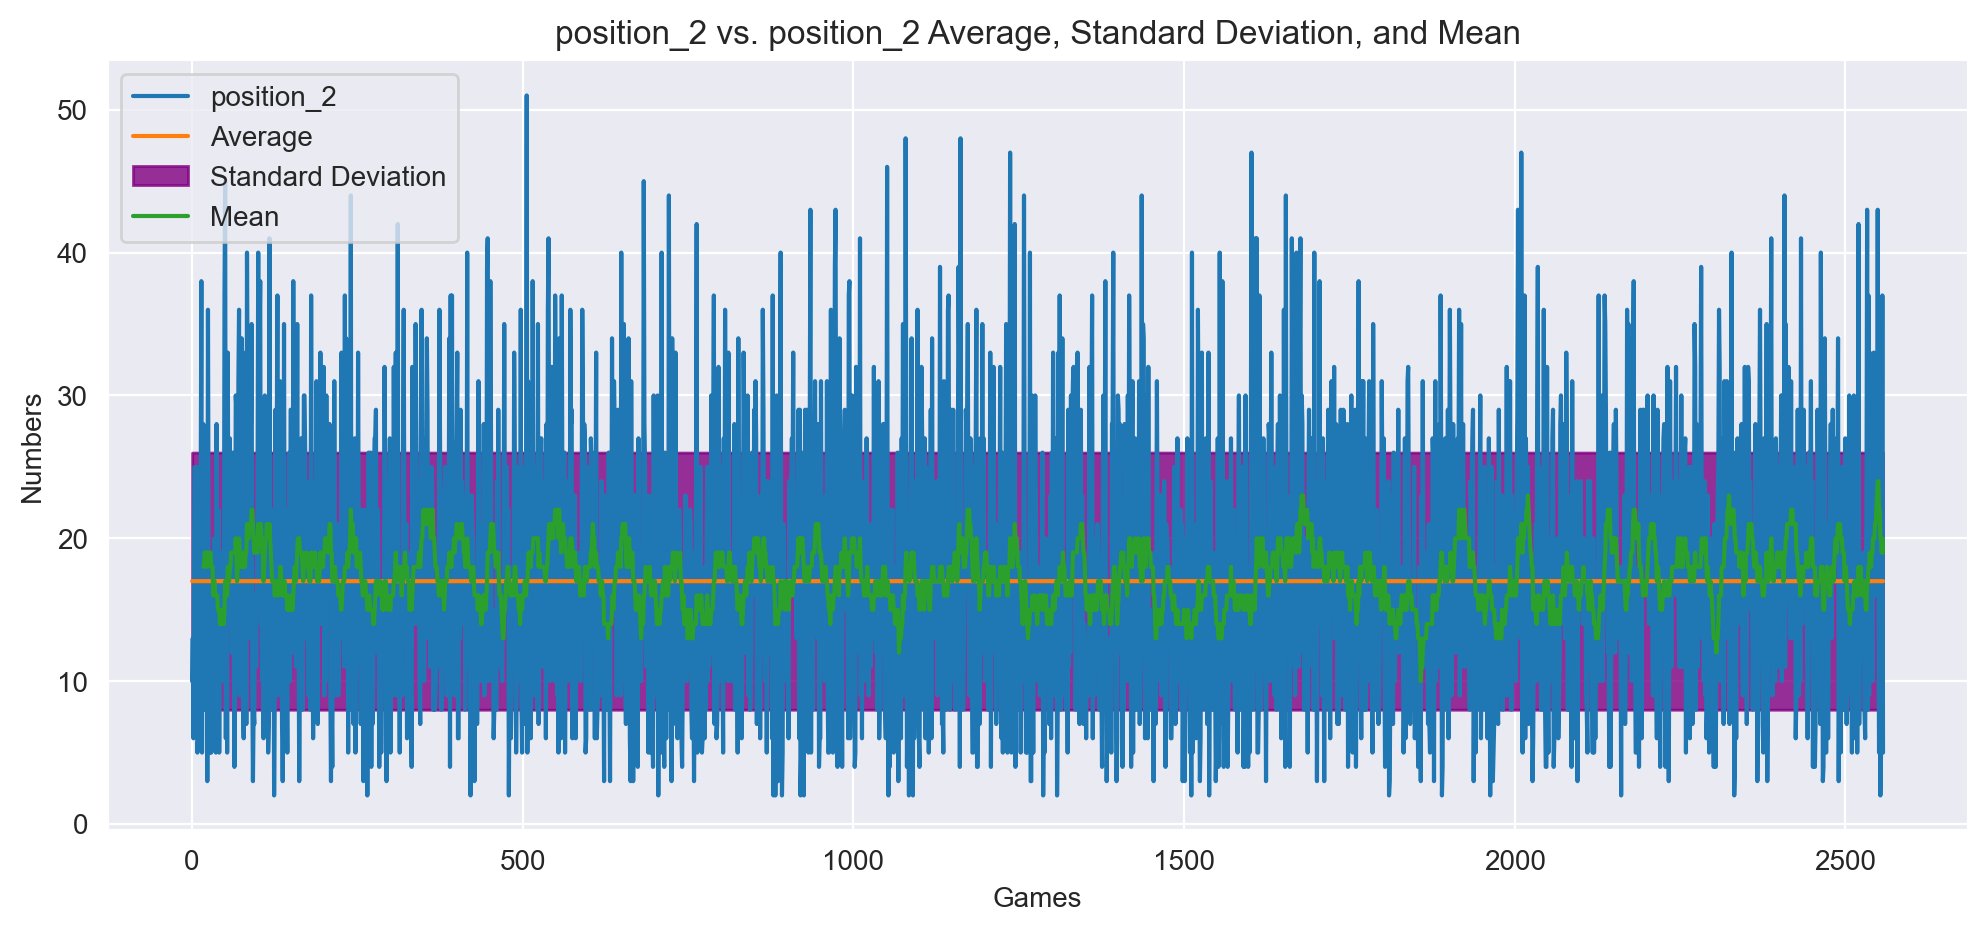

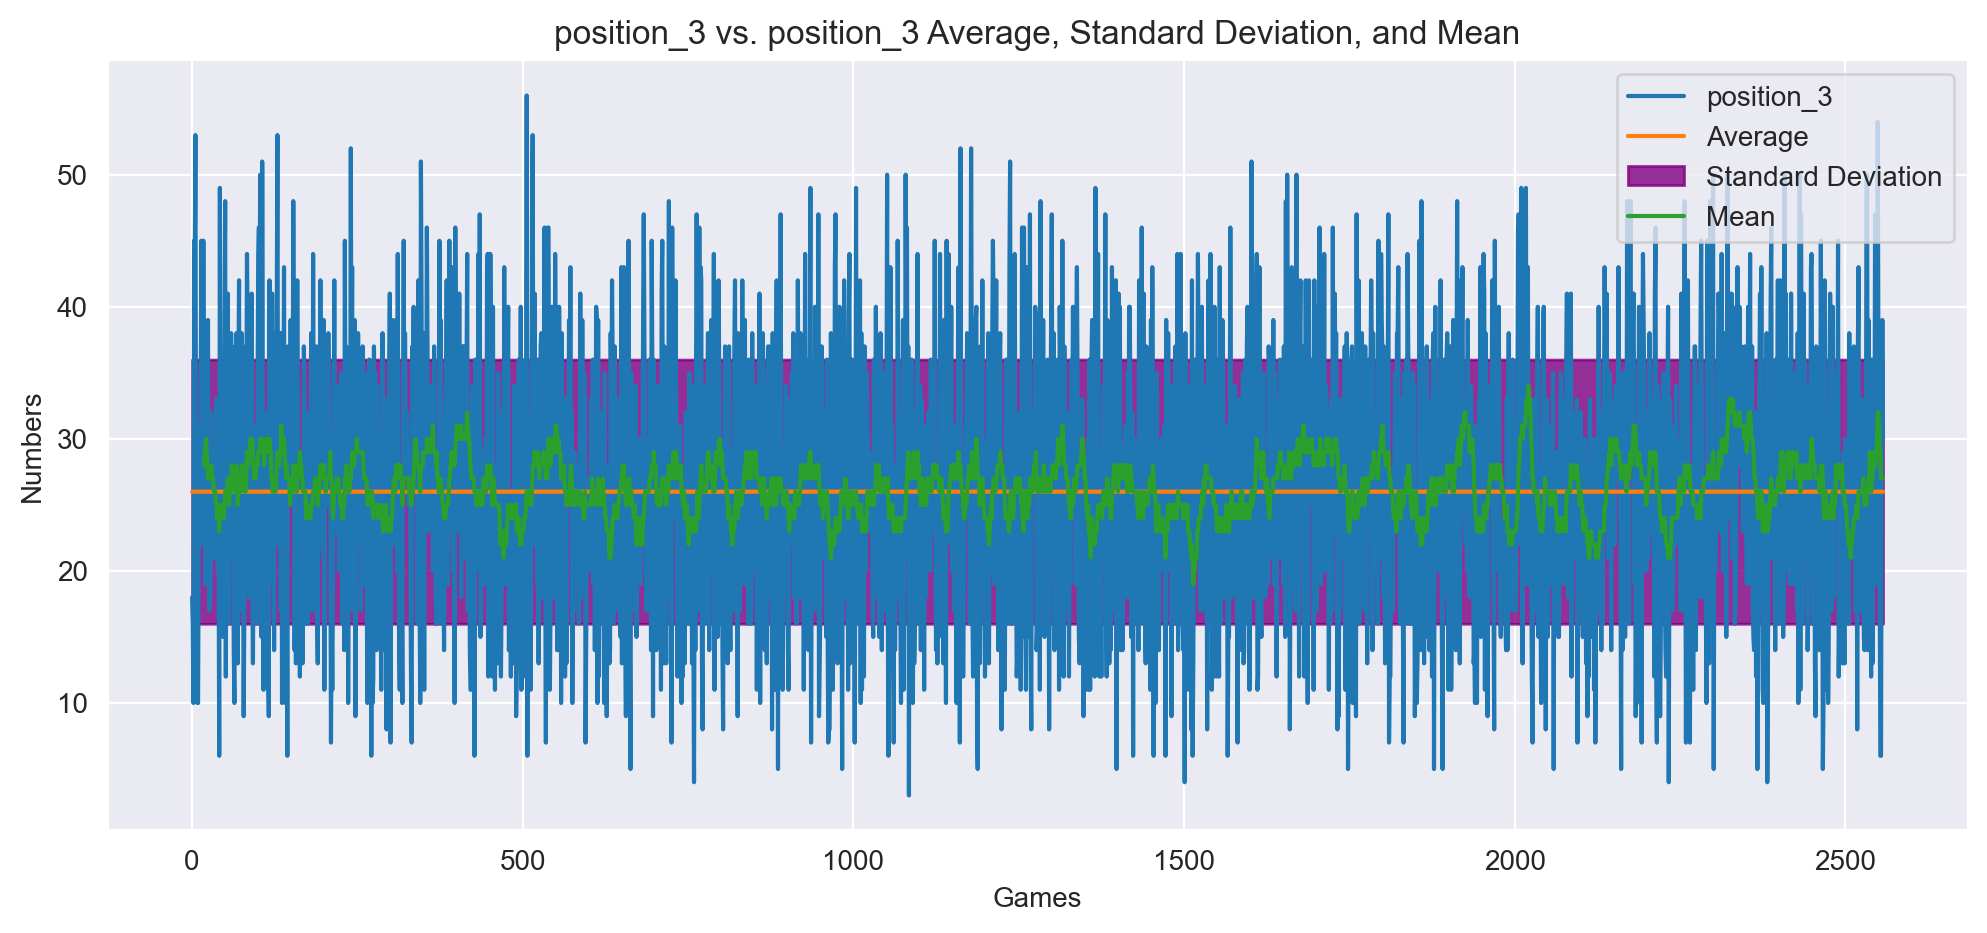

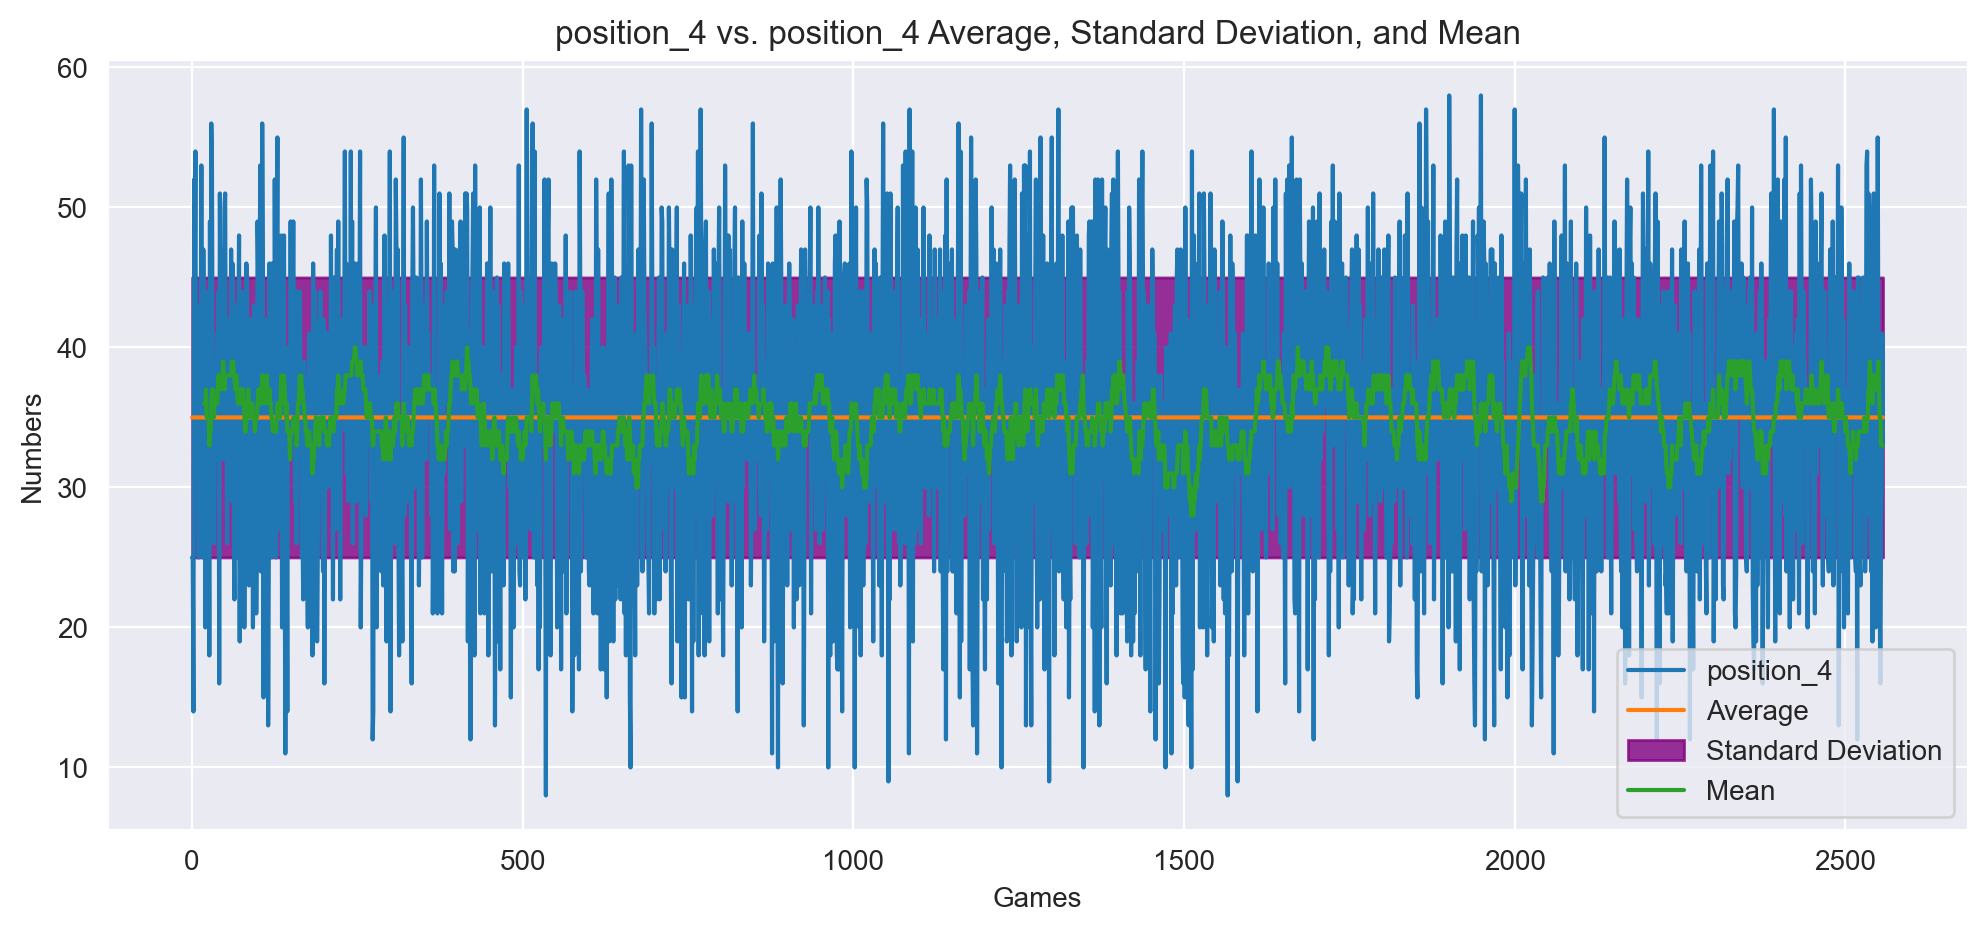

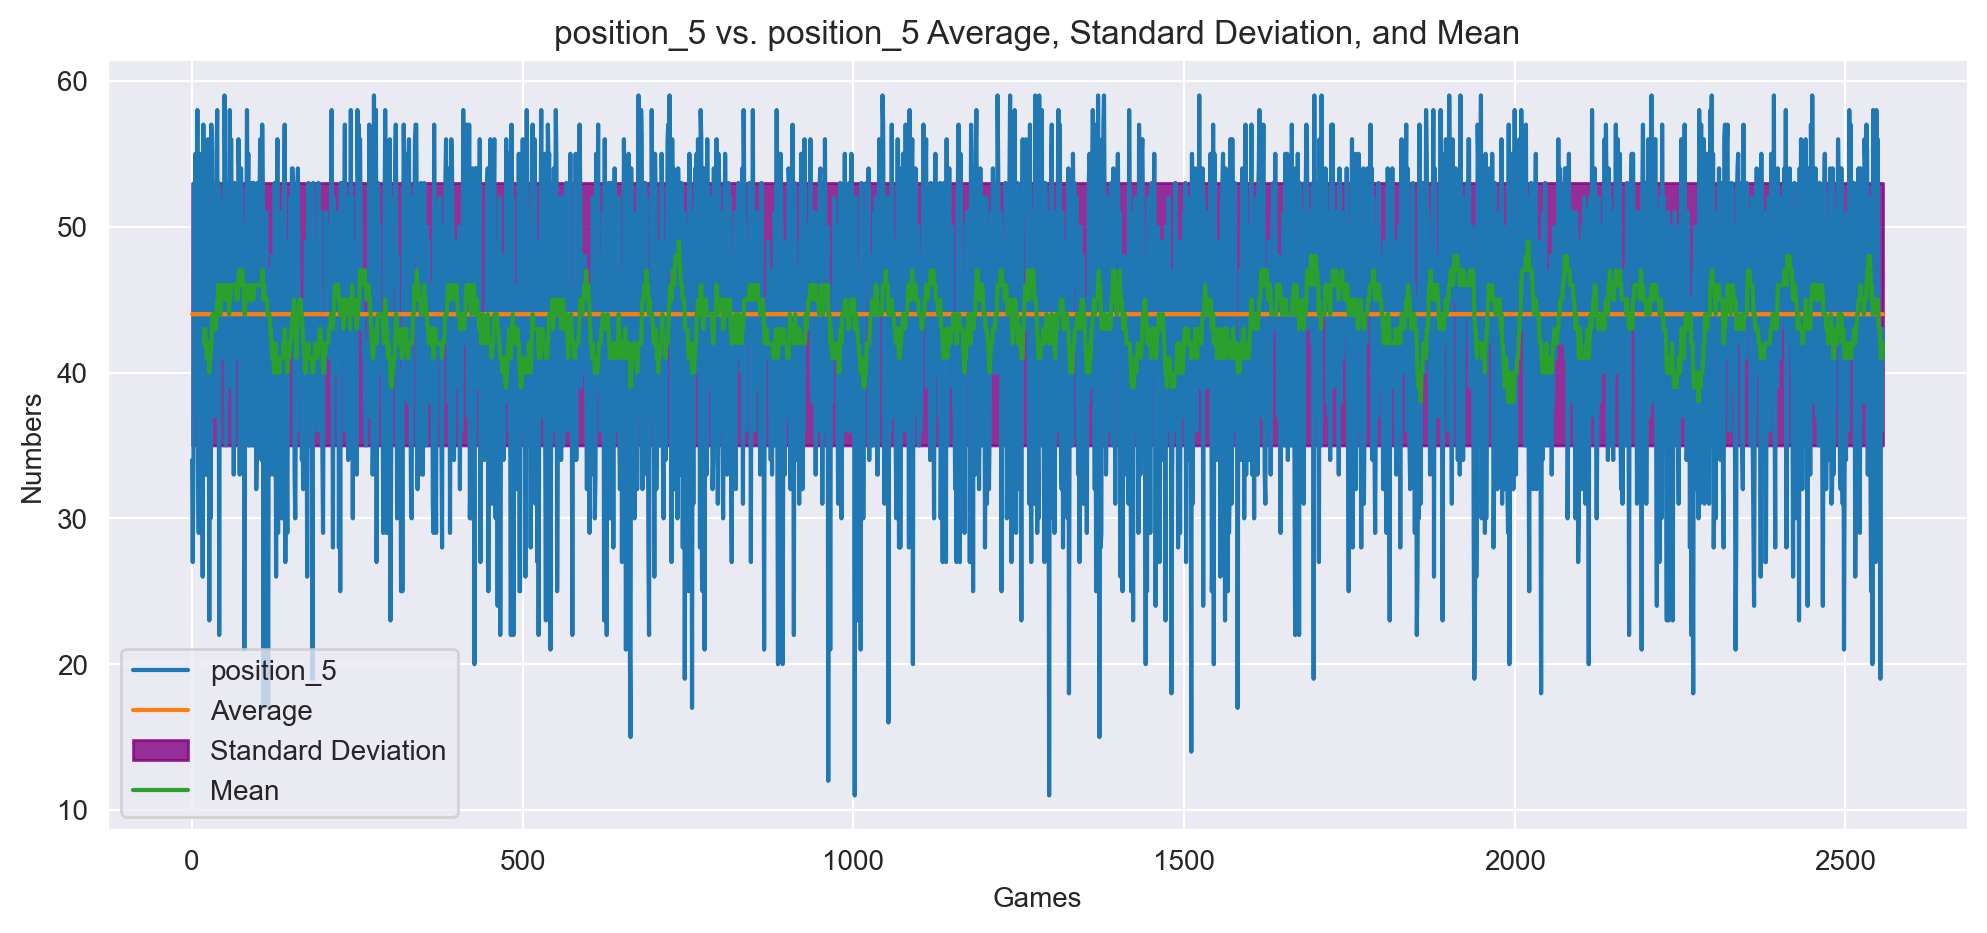

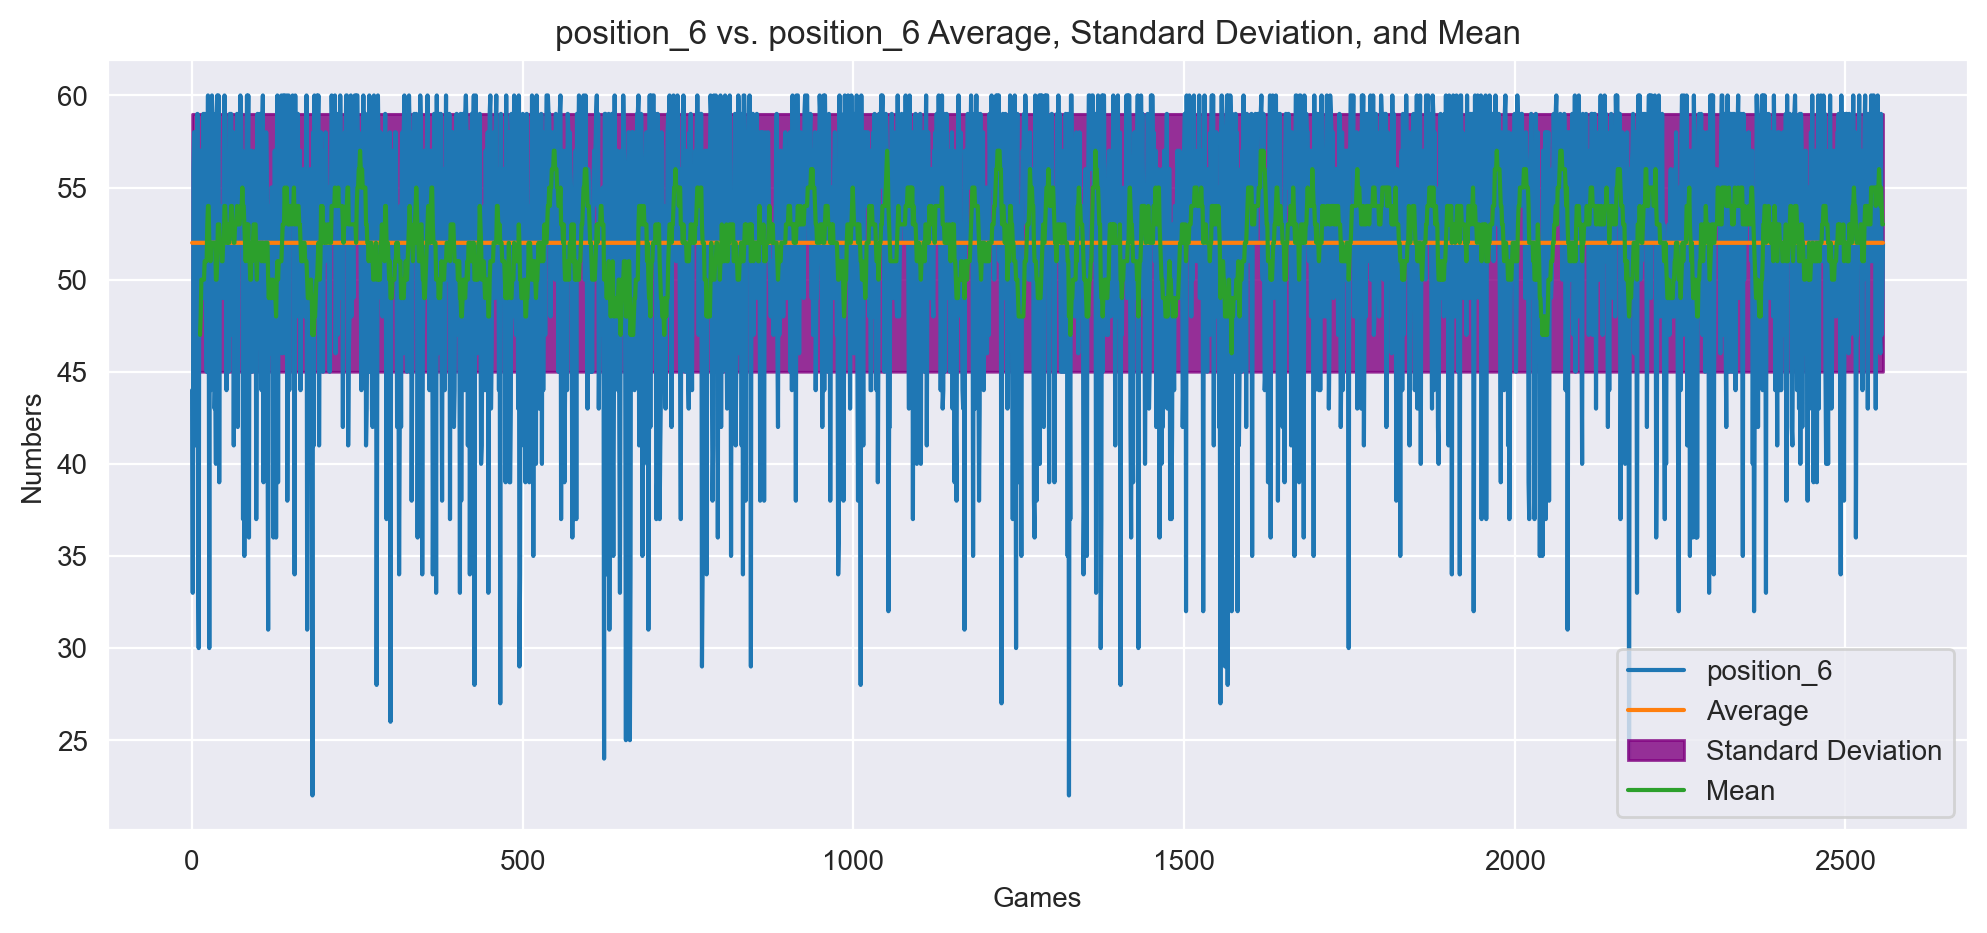

In [12]:
# Create a dictionary to store position data
position_data = {}

# Iterate over the positions and plot each position's graph
for position in positions:
    # Extract position data and calculate its average and standard deviation
    position_data[position] = games[position]
    position_avg = pd.Series([position_data[position].mean()] * len(position_data[position])).round(0)
    position_std = pd.Series([position_data[position].std()] * len(position_data[position])).round(0)
    position_std_max = pd.Series([(position_avg + position_std)[0]] * len(position_data[position])).round(0)
    position_std_min = pd.Series([(position_avg - position_std)[0]] * len(position_data[position])).round(0)
    window_length = int(position_data[position].std() * 2)
    position_data[position+'_mean'] = position_data[position].rolling(window_length).mean().round(0) # Adding the rolling mean
    
    # Plot the position graph with average, standard deviation, and mean
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(position_data[position], label=position)
    ax.plot(position_avg, label='Average')
    ax.fill_between(position_data[position].index, position_std_min[0], position_std_max[0], alpha=0.8, color='purple', label='Standard Deviation')
    ax.plot(position_data[position+'_mean'], label='Mean')
    ax.set_xlabel('Games')
    ax.set_ylabel('Numbers')
    ax.set_title(position + ' vs. ' + position + ' Average, Standard Deviation, and Mean')
    ax.legend()
    plt.show()


### Using ARIMA Model to predict next result

#### Prediction using games model

In [13]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

# Check data characteristics
def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    # Get the ADF test results
    adf_stat = dftest[0]
    p_val = dftest[1]
    num_lags = dftest[2]
    num_obs = dftest[3]
    crit_vals = dftest[4]

    # Check if the dataset is stationary
    if p_val <= 0.05:
        is_stationary = True
    else:
        is_stationary = False

    # Check if the dataset is predictable
    if is_stationary and abs(adf_stat) > crit_vals['5%']:
        is_predictable = True
    else:
        is_predictable = False

    # Print the results
    print("Is stationary? ", is_stationary)
    print("Is predictable? ", is_predictable)

# Define parameters for ARIMA model
# p: Qty of past numbers considered
# d: Hability to capture flutuations and spikes
# q: Moving average window
p, d, q = 5, 1, 1

# Fit ARIMA models for each position
models = {}
avg_array = []
std_array = []
for position in positions:
    # Get global average
    input_data = position_data[position]
    avg_array.append(input_data.mean().round(0))
    std_array.append(input_data.std().round(0))
    # Replace NaN values with 0
    input_data.fillna(0, inplace=True)
    # Fit the model
    model = ARIMA(input_data.values, order=(p, d, q)).fit()
    models[position] = model

# Predict next numbers for each position
predictions = {}
for position in positions:
    # Get the predicted values
    pred = models[position].forecast(steps=1)
    predictions[position] = int(pred[0])

predicted_numbers = [predictions[position] for position in positions]
    
# Check if predicted numbers fit the std
std_array_range = []
check_prediction = [True] * len(positions)
prediction_error_pct = []

for position in range(0,len(positions)):
    prediction_error = round(avg_array[position] - predicted_numbers[position], 0)
    prediction_error_pct.append(round(prediction_error/avg_array[position] * 100, 2))
    std_min = avg_array[position] - std_array[position];
    std_max = avg_array[position] + std_array[position];
    std_array_range.append(str(std_min) + ' - ' + str(std_max))
    # Check if the predicted number is outside the range defined by the mean +/- the standard deviation
    if predicted_numbers[position] < std_min or predicted_numbers[position] > std_max:
        check_prediction[position].append(False)
    
for position in positions:
    print('AD Test ', position, ':')
    ad_test(position_data[position])

print('Predicted Numbers: ', predicted_numbers)
print('Mean: ', avg_array)
print('Standard Deviation (min-max): ', std_array_range)
print('Predicted value inside of range with Std: ', check_prediction)
print('Prediction Error (%): ', prediction_error_pct)



ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
# Generate random data for 100 games and 5 positions
np.random.seed(42)
predictions_qty = 10
# position_data = {position: pd.Series(np.random.randint(0, predictions_qty, predictions_qty)) for position in positions}

# Define parameters for ARIMA model
# p: Qty of past numbers considered
# d: Hability to capture flutuations and spikes
# q: Moving average window
p, d, q = 10, 1, 2

# print(position_data)
# Fit ARIMA models for each position
models = {}
for position in positions:
   # Get global average
    input_data = position_data[position]
    # Replace NaN values with 0
    input_data.fillna(0, inplace=True)
    # Fit the model
    model = ARIMA(input_data.values, order=(p, d, q)).fit()
    models[position] = model

# Predict next numbers for each position for the next 100 games
predictions = {}
for position in positions:
    # Get the predicted values
    pred = models[position].forecast(steps=predictions_qty)
    predictions[position] = int()

# Plot predicted values for each position
print(predictions)

fig, ax = plt.subplots(figsize=(12, 5))

for position in positions:
    # Get the predicted values
    pred = models[position].forecast(steps=predictions_qty)
    # Create an array with the predicted values for all games
    y = np.full(predictions_qty, pred[0])
    plt.plot(np.arange(predictions_qty), y, label=position)

plt.legend()
plt.title('Predicted Values')
plt.xlabel('Game Number')
plt.ylabel('Value')
plt.show()